In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cs
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle
from sklearn import (cross_validation, feature_selection, pipeline,
                     preprocessing, linear_model, grid_search)
import pandas as pd
dataset = pd.read_csv('data.csv')
dataset = dataset.drop(['id'], axis=1)
dataset.head()
target = 'diagnosis'
var = dataset.var().sort_values()

dataset = dataset[['area_worst','area_mean','texture_worst','radius_mean','perimeter_se',target]]


sample = dataset[dataset[target] == 1]
control = dataset[dataset[target] == 0]
X_sample = sample.iloc[:, sample.columns != target].values
X_control = control.iloc[:, control.columns != target].values

sc = StandardScaler()
sc.fit(np.vstack((X_sample,X_control)))
X_sample = sc.transform(X_sample)
X_control = sc.transform(X_control)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
X = dataset.iloc[:, dataset.columns != target].values
y = dataset.iloc[:, dataset.columns == target].values

In [15]:
type(X)

numpy.ndarray

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)
X = model.transform(X)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
X =[]
Y = []
for f in indices:
    Y.append(importances[indices[f]])
    X.append(dataset.columns.get_values()[indices[f]])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


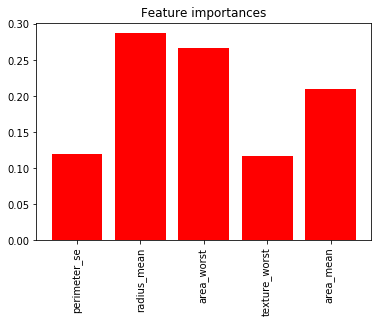

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(X, Y,color="r", align="center")
#plt.xticks(X, Y)
plt.xticks(rotation=90)
plt.savefig('filename.png',dpi = 1000)
plt.show()
# Plot the feature importances of the forest
plt.savefig('feature_importance.png', dpi=300)
plt.show()

In [19]:
X

['perimeter_se', 'radius_mean', 'area_worst', 'texture_worst', 'area_mean']

In [21]:
Y

[0.11960938524562999,
 0.287408196109712,
 0.26687201171827374,
 0.11680973631078373,
 0.2093006706156005]